# Task 3 : Unsupervised Learning (Cluster Analysis)
# By Urvin Desai

In [5]:
#importing important libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [6]:
# importing libraries to get number pf clusters 
import scipy.cluster.hierarchy as shc

In [7]:
# Importing AgglomerativeClustering Libarary 
from sklearn.cluster import AgglomerativeClustering

In [8]:
data = pd.read_csv('IRIS.csv' , encoding = 'latin')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Exporing the data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


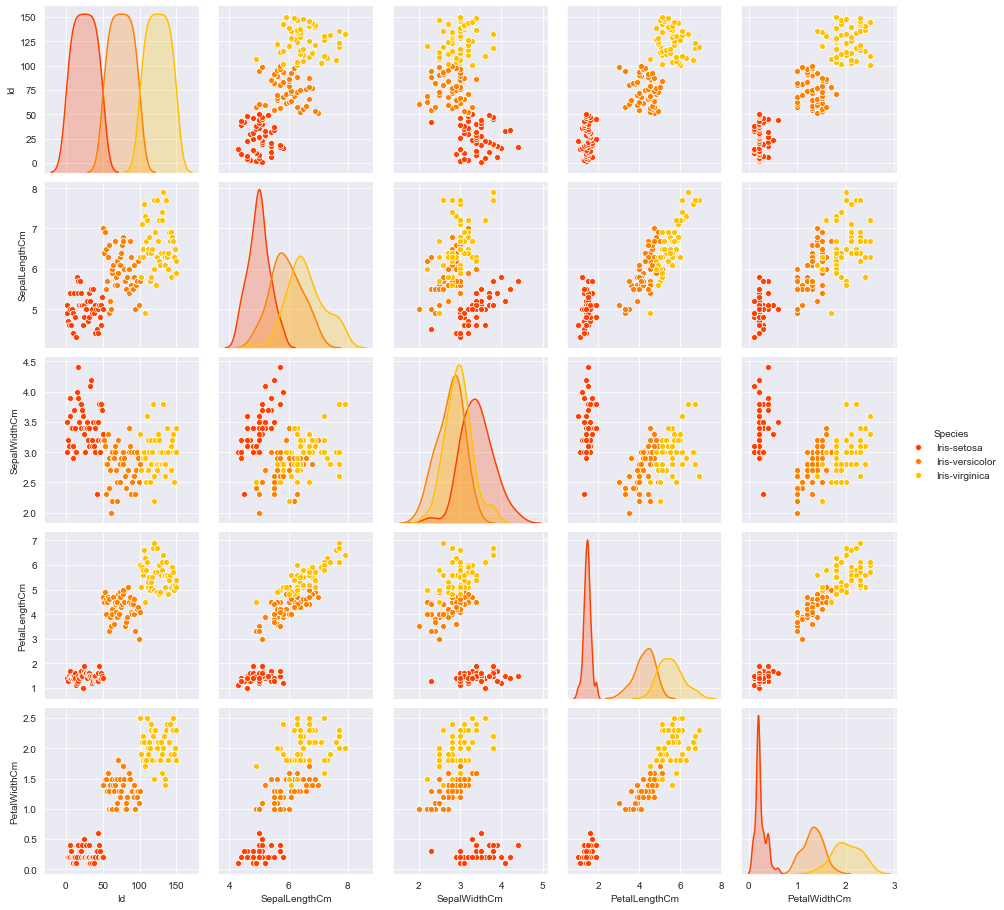

In [15]:
sns.set_style('darkgrid')

sns.pairplot(data ,hue = 'Species', palette= 'autumn' );

In [16]:
corr = data.corr()

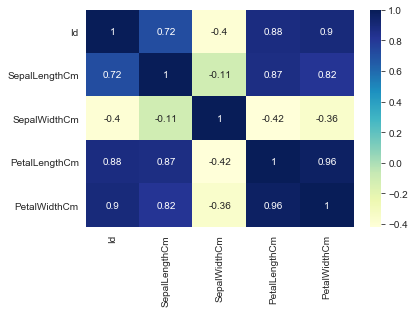

In [17]:
sns.heatmap(corr ,annot = True , cmap = 'YlGnBu' )

In [19]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [21]:
x = data.drop('Species' , axis = 1).values

## Visualising dendogram to get optimum number of clusters

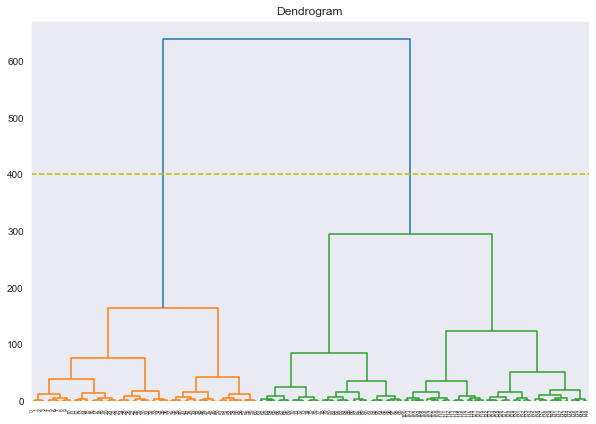

In [26]:
sns.set_style('dark')
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(x, method='ward' , optimal_ordering = True) , get_leaves = False)
plt.axhline(y=400, color='y', linestyle='--')

#### Number of clusters depends upon the number of vertiical lines intersected by yellow line . Here , it is 2 . So we will have two clusters .

## Hierarchial Clustering

Hierarchial Clustering is of two types :

   1) Agglomerative Hierarchial Clustering
   
   2) Divisive Hierarchical Clustering

   Here, we will go with Agglomerative Hierarchial Clustering.

In [27]:
#Instantiating and fitting model
model = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean' , linkage = 'ward')
model.fit(x)

AgglomerativeClustering()

In [28]:
labels = model.fit_predict(x)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Visualising clusters

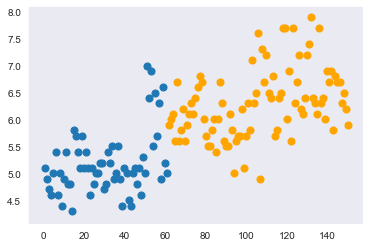

In [29]:
sns.set_style('dark')
plt.scatter(x[labels==0, 0], x[labels==0, 1], s=50, marker='o', color = 'Orange')
plt.scatter(x[labels==1, 0], x[labels==1, 1], s=50, marker='o' , cmap = 'virdis')